In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Import DecisionTree as a classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
from sklearn.metrics import recall_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.metrics import precision_score

In [209]:
path = '/home/malpizar/Documents/MultipleScattering/backup/'
file = 'RecoilsData.csv'

df = pd.read_csv(path + file)

#drop events with no recoils at all
df = df[df['ar40recoils'] != 0]

#drop rows with the value -99999, these are outliers
df = df.drop(index=df[df.eq(-99999).any(axis=1)].index)

df.head()
print(df.shape)

(1209, 25)


In [210]:
#drop the variable used to make the flags for multiple recoils
df = df.drop(['ar40recoils'], axis=1) 
print(df.shape)

(1209, 24)


In [211]:
# Count the occurrences of each value in multiplerecoils
value_counts = df['multiplerecoils'].value_counts()
print(value_counts)

1    934
0    275
Name: multiplerecoils, dtype: int64


In [212]:
# Drop rows with multiplerecoils to make it more even between multiple and single
df = df.drop(df[df['multiplerecoils'] == 1].head(659).index)

# Count the occurrences of each value in multiplerecoils again
value_counts = df['multiplerecoils'].value_counts()
print(value_counts)

0    275
1    275
Name: multiplerecoils, dtype: int64


In [195]:
# Get a random permutation of the DataFrame's index
random_order = np.random.RandomState(seed=42).permutation(df.index)

# Reorder the DataFrame randomly using the random permutation
df = df.loc[random_order]

In [196]:
# Count the occurrences of each value in multiplerecoils again
value_counts = df['multiplerecoils'].value_counts()
print(value_counts)

0    275
1    275
Name: multiplerecoils, dtype: int64


In [ ]:
#dependent variable that will be predicted
var = 'multiplerecoils'

X = df.drop([var], axis=1)

# Select the dependent variable
y = df[var] 

print(X.shape)
print(y.shape)

In [198]:
# Create the GradientBoostingClassifier (Boosted Decision Tree)
boosted_tree = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

print("Created Boosted Decision Tree Classifier")

Created Boosted Decision Tree Classifier


In [199]:
# Perform cross-validation with 10 folds
# 'cv' parameter specifies the number of folds
# 'scoring' parameter specifies the evaluation metric (e.g., 'accuracy')
cross_val_scores = cross_val_score(boosted_tree, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:")
for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: {score:.2f}")

# Calculate and print the average cross-validation score
average_score = cross_val_scores.mean()
print(f"\nAverage Score: {average_score:.2f}")

Cross-Validation Scores:
Fold 1: 0.58
Fold 2: 0.60
Fold 3: 0.73
Fold 4: 0.73
Fold 5: 0.67
Fold 6: 0.67
Fold 7: 0.76
Fold 8: 0.76
Fold 9: 0.51
Fold 10: 0.80

Average Score: 0.68


In [200]:
scores = cross_validate(boosted_tree, X, y, cv=10, scoring='accuracy',return_train_score=True)

# Print the cross-validation scores for each fold
print("Cross-Validate Test Scores:")
for fold, score in enumerate(scores['test_score'], start=1):
    print(f"Fold {fold}: {score:.2f}")

# Calculate and print the average cross-validation score
average_scoreval = scores['test_score'].mean()
print(f"\nAverage Test Score: {average_scoreval:.2f}")

# Print the cross-validation train scores for each fold
print("\nCross-Validate Train Scores:")
for fold, score in enumerate(scores['train_score'], start=1):
    print(f"Fold {fold}: {score:.2f}")

# Calculate and print the average cross-validation score
average_scoreval = scores['train_score'].mean()
print(f"\nAverage Train Score: {average_scoreval:.2f}")

# Print the cross-validation fit times for each fold
print("\nFit Times (s):")
for fold, fit_time in enumerate(scores['fit_time'], start=1):
    print(f"Fold {fold}: {fit_time:.2f}")

# Calculate and print the average fit time
average_fittime = scores['fit_time'].mean()
print(f"\nAverage fit time: {average_fittime:.2f}")

# Print the cross-validation score times for each fold
print("\nScore Times (s):")
for fold, score_time in enumerate(scores['score_time'], start=1):
    print(f"Fold {fold}: {score_time:.2f}")

# Calculate and print the average score time
average_scoretime = scores['score_time'].mean()
print(f"\nAverage score time: {average_scoretime:.2f}")

Cross-Validate Test Scores:
Fold 1: 0.58
Fold 2: 0.60
Fold 3: 0.73
Fold 4: 0.73
Fold 5: 0.67
Fold 6: 0.67
Fold 7: 0.76
Fold 8: 0.76
Fold 9: 0.51
Fold 10: 0.80

Average Test Score: 0.68

Cross-Validate Train Scores:
Fold 1: 0.96
Fold 2: 0.95
Fold 3: 0.96
Fold 4: 0.96
Fold 5: 0.97
Fold 6: 0.96
Fold 7: 0.96
Fold 8: 0.97
Fold 9: 0.98
Fold 10: 0.96

Average Train Score: 0.96

Fit Times (s):
Fold 1: 0.26
Fold 2: 0.17
Fold 3: 0.17
Fold 4: 0.17
Fold 5: 0.17
Fold 6: 0.34
Fold 7: 0.25
Fold 8: 0.18
Fold 9: 0.18
Fold 10: 0.17

Average fit time: 0.21

Score Times (s):
Fold 1: 0.00
Fold 2: 0.00
Fold 3: 0.00
Fold 4: 0.00
Fold 5: 0.00
Fold 6: 0.00
Fold 7: 0.00
Fold 8: 0.00
Fold 9: 0.00
Fold 10: 0.00

Average score time: 0.00


In [201]:
# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(440, 23)
(440,)
(110, 23)
(110,)


In [202]:
#Train DT
boosted_tree.fit(X_train, y_train)
print("Training set score: %f" % boosted_tree.score(X_train, y_train))
print("Test set score: %f" % boosted_tree.score(X_test, y_test))

Training set score: 0.975000
Test set score: 0.690909


In [203]:
# Make predictions on the test set
y_pred = boosted_tree.predict(X_test)

In [204]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.69091


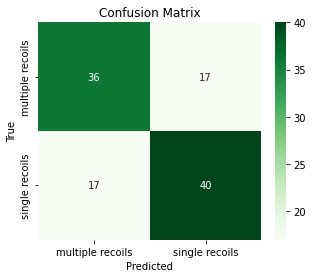

In [205]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
#class_labels = df[var].unique()
class_labels = ['multiple recoils', 'single recoils']

#print(df[var].unique())

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')

# Add a legend
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [206]:
#calculate recall, precision and F1 score

rec = recall_score(y_test, y_pred, average='weighted')
pres = precision_score(y_test, y_pred, average='weighted')

F1_score = 2/((1/rec) + (1/pres))

print("The recall is: ", rec)
print("The precision is: ", pres)
print("The F1-score is: ", F1_score)

The recall is:  0.6909090909090909
The precision is:  0.6909090909090909
The F1-score is:  0.6909090909090909


In [207]:
# Get the feature importances
importance = boosted_tree.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Sum all the importance values
total_importance = feature_importances_df.sum()
print("")
print(f"Total Importance: {total_importance['Importance']}")

                   Feature  Importance
1                  fprompt    0.180717
14          rprompt60Bayes    0.123929
5                   fmaxpe    0.094427
8         chargesecondring    0.086298
18           mblikelihoodR    0.053145
13                nSCBayes    0.048420
22                  deltat    0.046553
10  chargesecondbottomring    0.043589
17           mblikelihoodZ    0.040073
21               timefit2Z    0.038318
9         chargebottomring    0.037585
3                eventTime    0.031767
15           mblikelihoodX    0.031753
11   chargethirdbottomring    0.026527
12      pulseindexfirstgar    0.024373
0                      qPE    0.023448
16           mblikelihoodY    0.023186
20               timefit2Y    0.013599
19               timefit2X    0.012924
7            chargetopring    0.011499
4           numEarlyPulses    0.007871
6                neckVetoN    0.000000
2                subeventN    0.000000

Total Importance: 1.0
